# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
# Importing training data
path = r"D:\Nikss\Projects\Flight Price Prediction\Datasets\train_data.csv"
df = pd.read_csv(path)

In [128]:
df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-05-01,Banglore,Delhi,21:10:00,00:05:00,175,0.0,No Info,4991
1,Vistara,2019-06-01,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982
2,Jet Airways,2019-06-09,Delhi,Cochin,17:30:00,12:35:00,1145,1.0,In-flight meal not included,10262
3,Air India,2019-05-18,Kolkata,Banglore,12:00:00,18:30:00,1830,2.0,No Info,10361
4,Jet Airways,2019-03-24,Mumbai,Hyderabad,15:50:00,17:20:00,90,0.0,In-flight meal not included,2228


In [129]:
df.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

# 2. Fixing data types
* convert `date_of_journey`, `dep_time` and `arrival_time` to `datetime` format
* convert  `total_stops` as categorical as it is a categorical column

In [130]:
# Converting dtypes of some columns to datetime

# convert function
def convert_datetime(column_name, format = None, time = False):

    if time:
        df[column_name] = pd.to_datetime(df[column_name], errors = 'coerce', format = format).dt.time
    
    else:   
        df[column_name] = pd.to_datetime(df[column_name], errors = 'coerce', format = format)


# df['date_of_journey'] = pd.to_datetime(df['date_of_journey'], errors='coerce')

convert_datetime(column_name = 'date_of_journey')
convert_datetime(column_name = 'dep_time', format  = "%H:%M:%S", time = True)
convert_datetime(column_name = 'arrival_time', format  = "%H:%M:%S", time = True)

# converting total_stops to categorical column
# df['total_stops'] = df['total_stops'].astype('category')

# Will do at the time of Training bcz We may need it in EDA

In [131]:
df.dtypes

# dep_time and arrival_time are converted to datetime.time dtype but here it shows object bcz this is how Pandas work.

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [132]:
df['dep_time'][0]

# See here, it shows datetime object

datetime.time(21, 10)

In [133]:
df[['date_of_journey', 'dep_time', 'arrival_time']]

,date_of_journey,dep_time,arrival_time
0,2019-05-01,21:10:00,00:05:00
1,2019-06-01,17:45:00,20:05:00
2,2019-06-09,17:30:00,12:35:00
3,2019-05-18,12:00:00,18:30:00
4,2019-03-24,15:50:00,17:20:00
...,...,...,...
7318,2019-05-15,10:20:00,17:35:00
7319,2019-05-21,10:35:00,21:00:00
7320,2019-05-01,20:25:00,10:55:00
7321,2019-06-03,07:00:00,21:00:00


# 3. High Level Summary of Data

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          7323 non-null   object        
 1   date_of_journey  7323 non-null   datetime64[ns]
 2   source           7323 non-null   object        
 3   destination      7323 non-null   object        
 4   dep_time         7323 non-null   object        
 5   arrival_time     7323 non-null   object        
 6   duration         7323 non-null   int64         
 7   total_stops      7322 non-null   float64       
 8   additional_info  7323 non-null   object        
 9   price            7323 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 572.2+ KB


In [135]:
df.describe(include = 'number')

,duration,total_stops,price
count,7323.000000,7322.000000,7323.000000
mean,626.587464,0.800601,9014.859893
std,500.034323,0.659777,4519.877872
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5226.000000
50%,500.000000,1.000000,8266.000000
75%,910.000000,1.000000,12373.000000
max,2860.000000,4.000000,62427.000000


In [136]:
df.describe(include = 'O')

,airline,source,destination,dep_time,arrival_time,additional_info
count,7323,7323,7323,7323,7323,7323
unique,9,5,6,218,217,7
top,Jet Airways,Delhi,Cochin,18:55:00,19:00:00,No Info
freq,2587,3018,3018,164,387,5734


In [ ]:
# Getting missing values
def missing_values(df):
    print(df.isnull().sum())

    user_input = input("Drop missing values? (y/n): ")

    if user_input.lower() == 'y':
        df.dropna(inplace = True)
        print()
        peint()
        print("Missing values dropped.")

# Caliing function
missing_values(df)

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64
Missing values dropped.


In [143]:
# Outlier Detection using Islolation Forest
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators = 100, random_state = 1)

outliers = iso.fit_predict(
    df.drop(columns = 'price')
    .select_dtypes(include = 'number'))    # We have only one numeric column- 'duration'

df['outlier'] = outliers

df.head()

# -1 means outliers and 1 means Normal point
# We have only one numeric column- 'duration'

# We are not dealing with outliers as for now, but we should also ensure whether they are true outliers or not.
# If yes, we should deal with them, either by removing them or capping them.

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Spicejet,2019-05-01,Banglore,Delhi,21:10:00,00:05:00,175,0.0,No Info,4991,-1
1,Vistara,2019-06-01,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982,-1
2,Jet Airways,2019-06-09,Delhi,Cochin,17:30:00,12:35:00,1145,1.0,In-flight meal not included,10262,-1
3,Air India,2019-05-18,Kolkata,Banglore,12:00:00,18:30:00,1830,2.0,No Info,10361,-1
4,Jet Airways,2019-03-24,Mumbai,Hyderabad,15:50:00,17:20:00,90,0.0,In-flight meal not included,2228,-1


In [144]:
df.query('outlier == -1')

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Spicejet,2019-05-01,Banglore,Delhi,21:10:00,00:05:00,175,0.0,No Info,4991,-1
1,Vistara,2019-06-01,Chennai,Kolkata,17:45:00,20:05:00,140,0.0,No Info,11982,-1
2,Jet Airways,2019-06-09,Delhi,Cochin,17:30:00,12:35:00,1145,1.0,In-flight meal not included,10262,-1
3,Air India,2019-05-18,Kolkata,Banglore,12:00:00,18:30:00,1830,2.0,No Info,10361,-1
4,Jet Airways,2019-03-24,Mumbai,Hyderabad,15:50:00,17:20:00,90,0.0,In-flight meal not included,2228,-1
...,...,...,...,...,...,...,...,...,...,...,...
7313,Spicejet,2019-05-27,Banglore,Delhi,05:55:00,08:35:00,160,0.0,No Info,3311,-1
7314,Indigo,2019-03-03,Delhi,Cochin,02:35:00,08:30:00,355,1.0,No Info,13790,-1
7317,Indigo,2019-05-21,Delhi,Cochin,16:00:00,21:00:00,300,1.0,No Info,7255,-1
7320,Jet Airways,2019-05-01,Kolkata,Banglore,20:25:00,10:55:00,870,1.0,No Info,12121,-1


# 4. Correlation Analysis

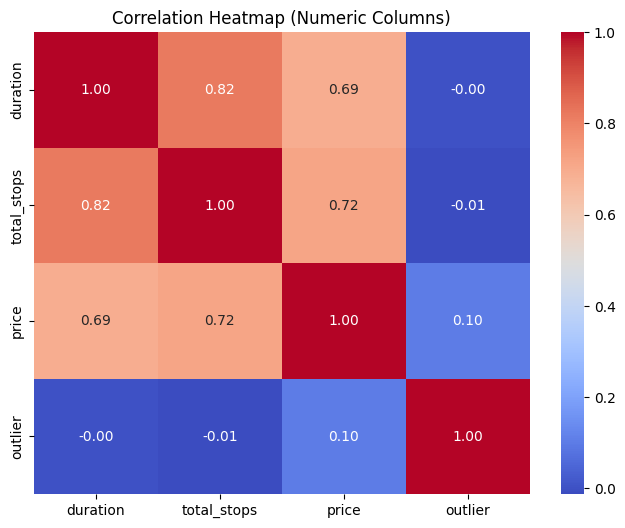

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_matrix = df.corr(method = 'spearman', numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


In [117]:
df.select_dtypes(include = 'number')

,duration,price,outlier
0,175,4991,1
1,140,11982,1
2,1145,10262,-1
3,1830,10361,-1
4,90,2228,-1
...,...,...,...
7318,435,8355,1
7319,625,6794,1
7320,870,12121,1
7321,840,7618,1


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time                   object
arrival_time               object
duration                    int64
total_stops              category
additional_info            object
price                       int64
outlier                     int32
dtype: object